In [ ]:
# Nate Brunacini, nbrunaci@u.rochester.edu
# Supervisor: Kelly A. Douglass
# This file runs the findMetallicities_Brown function from findmetallicities over all galaxies in the MaNGA dataset and 
# writes the results to a FITS file.

In [1]:
from findmetallicities import *
import time
from astropy.table import Table
import os

/home/nbrunaci/.local/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to DR15
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [2]:
# Calling the functions

# Obtaining redshift data from drpall fits file
with fits.open('drpall-v2_4_3.fits', memmap=True) as drpall:
    data = drpall[1].data
    
#     # Temporary
#     for i in range(0,10):
#         print(data['plateifu'][5250+i])
    
    exceptions = 0# Number of galaxies for which data could not be retrieved
    start = time.time()
    for index in range(2274,len(data['plateifu'])):# Use this to iterate over every galaxy
#     for index in range(0,1):
        try:#for i in range(0,1):#
            # Calculating metallicities
            plateifu = data['plateifu'][index]
            objmaps = addDiagnostics(plateifu)
            massMap = getMassMap(plateifu)
            results = findMetallicities_Brown(objmaps,massMap)
            
            # Preparing layers of data values
            header = fits.PrimaryHDU([])
            N2_hdu = fits.ImageHDU(results['N2']['metallicity'].data, name='N2_metallicity')
            O3N2_hdu = fits.ImageHDU(results['O3N2']['metallicity'].data, name='O3N2_metallicity')
            N2O2_hdu = fits.ImageHDU(results['N2O2']['metallicity'].data, name='N2O2_metallicity')
            N2_ivar_hdu = fits.ImageHDU(results['N2']['ivar'].data, name='N2_ivar')
            O3N2_ivar_hdu = fits.ImageHDU(results['O3N2']['ivar'].data, name='O3N2_ivar')
            N2O2_ivar_hdu = fits.ImageHDU(results['N2O2']['ivar'].data, name='N2O2_ivar')
            
            # Preparing layers of mask values; ImageHDU apparently cannot be used for boolean values, so mask values are 
            # converted to integers here
            N2_m_hdu = fits.ImageHDU(results['N2']['metallicity'].mask.astype('int32'), name='N2_mask')
            O3N2_m_hdu = fits.ImageHDU(results['O3N2']['metallicity'].mask.astype('int32'), name='O3N2_mask')
            N2O2_m_hdu = fits.ImageHDU(results['N2O2']['metallicity'].mask.astype('int32'), name='N2O2_mask')
            # The masks (below) for the ivar values are exactly the same as those (above) for the metallicity values
            # No need to store duplicate masks
#             N2_ivar_m_hdu = fits.ImageHDU(results['N2']['ivar'].mask.astype('int32'), name='N2_ivar_mask')
#             O3N2_ivar_m_hdu = fits.ImageHDU(results['O3N2']['ivar'].mask.astype('int32'), name='O3N2_ivar_mask')
#             N2O2_ivar_m_hdu = fits.ImageHDU(results['N2O2']['ivar'].mask.astype('int32'), name='N2O2_ivar_mask')
            
#             # Temporary
#             for row in range(0,len(N2_m_hdu.data)):
#                 for val in range(0,len(N2_m_hdu.data[0])):
#                     if not N2O2_m_hdu.data[row][val] == N2O2_ivar_m_hdu.data[row][val]:
#                         print(row,val)
#             print(N2_m_hdu.data[4][5],N2_ivar_m_hdu.data[4][5])
            
            # Saving data and mask layers to FITS file
            hdul = fits.HDUList([header, N2_hdu, O3N2_hdu, N2O2_hdu, N2_ivar_hdu, O3N2_ivar_hdu, N2O2_ivar_hdu, N2_m_hdu, O3N2_m_hdu, 
                         N2O2_m_hdu])#, N2_ivar_m_hdu, O3N2_ivar_m_hdu, N2O2_ivar_m_hdu])
            filename = 'MetallicityFITS/Brown_'+plateifu+'.fits'
            # Removing existing file to allow new one to be saved
            if os.path.exists(filename):
                os.remove(filename)
            hdul.writeto(filename)
            
            # Saving N2 metallicity maps
            plt.imshow(results['N2']['metallicity'])
            plt.colorbar()
            plt.savefig('N2_metallicity_maps/' + plateifu + '_N2metallicity.png')
            plt.close()
            
#             # Saving O3N2 metallicity maps
#             plt.imshow(results['O3N2']['metallicity'])
#             plt.colorbar()
#             plt.savefig('O3N2_metallicity_maps/' + plateifu + '_O3N2metallicity.png')
#             plt.close()
            
#             # Saving N2O2 metallicity maps
#             plt.imshow(results['N2O2']['metallicity'])
#             plt.colorbar()
#             plt.savefig('N2O2_metallicity_maps/' + plateifu + '_N2O2metallicity.png')
#             plt.close()
        except Exception:
            exceptions += 1
            print(index)
    end = time.time()
    print('Number of galaxies for which data could not be retrieved: ' + str(exceptions))
    print('Elapsed time: ' + str(end - start))

2276
2277
2279
2280
2281
2283
2285
2286
2287
2290
2291
2292
2293
2294
2295
2302
2304
2309
2313
2315
2316
2317
2319
2322
2323
2325
2328
2329
2331
2333
2335
2336
2338
2339
2340
2342
2345
2346
2347
2349
2351
2353
2354
2359
2360
2361
2362
2363
2364
2365
2367
2368
2369
2371
2372
2374
2375
2376
2377
2378
2380
2383
2384
2385
2386
2388
2390
2391
2393
2394
2395
2396
2398
2400
2401
2402
2403
2404
2406
2408
2409
2411
2413
2414
2417
2418
2419
2420
2421
2422
2426
2430
2431
2432
2439
2441
2444
2445
2448
2449
2450
2453
2454
2456
2457
2459
2460
2461
2465
2466
2467
2469
2470
2471
2473
2474
2475
2477
2478
2485
2486
2489
2492
2493
2494
2496
2497
2499
2500
2501
2504
2505
2508
2509
2513
2514
2516
2517
2518
2519
2520
2521
2522
2526
2527
2529
2531
2533
2534
2537
2541
2542
2543
2545
2546
2550
2551
2553
2554
2555
2556
2557
2558
2559
2563
2565
2566
2567
2569
2571
2572
2574
2575
2577
2579
2580
2582
2583
2584
2586
2588
2590
2591
2592
2593
2596
2597
2599
2600
2601
2603
2604
2605
2606
2607
2608
2609
2610
2611
2613


5055
5056
5058
5059
5060
5061
5063
5064
5065
5066
5067
5068
5069
5071
5072
5074
5075
5076
5077
5078
5080
5084
5085
5087
5088
5089
5090
5098
5099
5102
5103
5105
5106
5109
5111
5118
5119
5120
5121
5124
5125
5127
5128
5129
5131
5133
5135
5137
5138
5139
5142
5145
5146
5148
5150
5151
5152
5153
5154
5155
5159
5162
5163
5165
5166
5167
5169
5170
5171
5172
5175
5176
5177
5179
5180
5181
5182
5183
5184
5185
5186
5188
5189
5192
5193
5196
5197
5200
5201
5202
5204
5206
5209
5210
5211
5215
5216
5217
5220
5224
5225
5227
5228
5230
5231
5232
5234
5236
5237
5238
5239
5241
5242
5244
5245
5249
5250
5251
5253
5254
5258
5260
5261
5262
5263
5266
5267
5268
5271
5274
5275
5276
5277
5279
5280
5281
5282
5283
5284
5285
5287
5289
5293
5294
5296
5298
5299
5300
5302
5307
5308
5312
5313
5314
5319
5323
5324
5325
5328
5329
5330
5332
5333
5337
5339
5340
5341
5344
5346
5349
5352
5354
5355
5356
5360
5361
5362
5365
5366
5368
5369
5370
5371
5372
5375
5376
5377
5378
5379
5382
5383
5385
5386
5387
5391
5392
5393
5397
5400
5401


7840
7841
7842
7844
7847
7849
7851
7852
7853
7855
7856
7857
7860
7861
7862
7865
7868
7869
7870
7874
7875
7876
7878
7879
7881
7882
7884
7885
7886
7887
7888
7889
7890
7892
7893
7895
7896
7898
7899
7901
7905
7906
7907
7910
7911
7912
7913
7919
7920
7921
7922
7923
7924
7925
7926
7927
7932
7933
7938
7939
7941
7942
7948
7949
7950
7952
7953
7954
7956
7957
7958
7959
7960
7961
7964
7965
7967
7969
7972
7973
7975
7979
7980
7982
7985
7987
7988
7989
7991
7994
7999
8000
8004
8007
8008
8009
8011
8012
8014
8016
8018
8019
8020
8023
8024
8025
8027
8028
8029
8031
8033
8034
8035
8038
8039
8041
8042
8044
8045
8046
8048
8050
8051
8052
8053
8054
8055
8057
8058
8059
8060
8062
8063
8064
8065
8066
8067
8068
8069
8072
8073
8074
8076
8078
8079
8080
8081
8082
8083
8084
8085
8087
8088
8089
8090
8092
8094
8095
8096
8097
8099
8100
8102
8103
8105
8106
8107
8108
8109
8110
8112
8114
8116
8117
8118
8119
8120
8121
8123
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8140
8141
8142
8145
8147
8148
8149
8152
8155


10511
10513
10514
10516
10517
10518
10519
10520
10521
10522
10523
10524
10531
10534
10536
10537
10539
10540
10541
10542
10543
10544
10545
10546
10548
10549
10552
10554
10555
10559
10562
10564
10567
10568
10569
10570
10571
10572
10573
10575
10578
10580
10581
10582
10583
10584
10588
10591
10592
10596
10597
10600
10602
10603
10604
10609
10610
10612
10613
10614
10617
10618
10619
10620
10622
10623
10625
10631
10632
10633
10634
10635
10636
10639
10640
10641
10644
10646
10647
10649
10650
10651
10653
10654
10655
10656
10658
10659
10660
10661
10662
10663
10664
10666
10668
10670
10671
10673
10674
10677
10678
10681
10682
10686
10688
10689
10690
10691
10694
10695
10698
10699
10700
10701
10702
10703
10706
10707
10709
10710
10715
10717
10718
10719
10723
10724
10726
10727
10728
10729
10730
10731
10733
10735
10738
10740
10742
10743
10744
10745
10746
10747
10752
10753
10754
10756
10758
10759
10767
10768
10769
10770
10772
10775
10777
10778
10780
10781
10782
10785
10786
10787
10789
10792
10795
10797
1080

In [9]:
# Total number of galaxies: 11465
# 5001: 8716-3701
# 5252: 8239-3701
# 2256 were in the folder after the first run
# 11464-10711 = 753. 438/753 = 0.5816733067729084 (58% of galaxies in the final run had no data)

# Total number of galaxies with data files in the folder: 4520
# Total number of galaxies: 11465
# Fraction of galaxies on which this worked: 4520/11465 = 0.39424334932402966. There might be a problem

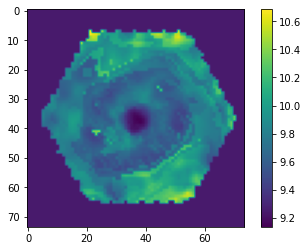

In [3]:
# with fits.open('MetallicityFITS/Brown_9487-12701.fits', mode='update') as hdul:
#     plt.imshow(hdul[1].data)
#     plt.colorbar()

In [ ]:
# All three methods (saving FITS files and maps) on galaxies 10711 through 11464:
# Number of galaxies for which data could not be retrieved: 438
# Elapsed time: 1217.1375243663788

# All three methods (saving FITS files and maps) on galaxy 0:
# Number of galaxies for which data could not be retrieved: 0
# Elapsed time: 4.215968132019043

# All three methods (saving FITS files and maps) on galaxies 0 through 9:
# Number of galaxies for which data could not be retrieved: 3
# Elapsed time: 25.11603307723999

# N2 method (map only) on galaxies 0 through 49:
# Number of galaxies for which data could not be retrieved: 26
# Elapsed time: 96.76484322547913

In [66]:
# Testing FITS file stuff

# N2_hdu = fits.PrimaryHDU(np.array([],dtype=object))
# O3N2_hdu = fits.ImageHDU(np.array([],dtype=object))
# N2O2_hdu = fits.ImageHDU(np.array([],dtype=object))
# hdul = fits.HDUList([N2_hdu, O3N2_hdu, N2O2_hdu])
# hdul.writeto('TestFITS/table12.fits')

# with fits.open('TestFITS/table12.fits', mode='update') as hdul:
#     hdul[0].data = [[34],[45,56],[64]]
# #     hdul[0].data = np.append(hdul[1].data,[[5,3],[6,3],[5]])
# #     print(hdul[0].data)
#     hdul.flush()